In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')


Getting stock data from Jan 1st 2012 to Jan 1st 2022 for the  following banks:
- Bank of America (BAC)
- CitiGroup (C)
- Goldman Sachs (GS)
- JPMorgan Chase (JPM)
- Morgan Stanley (MS)
- Wells Fargo (WFC)

In [92]:
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime(2023, 1, 1)

In [93]:
BAC = yf.download('BAC', start, end)
C = yf.download('C', start, end)
GS = yf.download('GS', start, end)
JPM = yf.download('JPM', start, end)
MS = yf.download('MS', start, end)
WFC = yf.download('WFC', start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [94]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2003-01-02   34.955002  35.424999  34.720001  35.340000  21.949942  12584000   
2003-01-03   35.049999  35.279999  34.770000  35.119999  21.813307   7803400   
2003-01-06   34.825001  35.849998  34.505001  35.625000  22.126959  12500600   
2003-01-07   35.630001  35.930000  35.415001  35.680000  22.161125   9804800   
2003-01-08   35.685001  35.685001  35.380001  35.535000  22.071068   8487600   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2003-01-02   357.000000  364.000000  350.899994  363.500000  ...  39.570000   
2003-01-03   363.500000  364.000000  358.100006  361.100006  ...  41.400002   
2003-01-06   363.500000  375.899994  362.700012  373.100006  ...  41.720001   
2003-01-07   373.200012  376.000000  366.799988  369.799988  ...  42.020000   
2003-01-08   365.500000  373.500000  364.100006  366.899994  ...  41.669998   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2003-01-02   41.939999  23.474197  4310700  23.575001  24.350000  23.525000   
2003-01-03   41.860001  23.429422  2963100  24.025000  24.315001  23.945000   
2003-01-06   42.990002  24.061901  4167300  23.900000  24.565001  23.900000   
2003-01-07   43.220001  24.190626  5213800  24.424999  24.549999  24.209999   
2003-01-08   41.919998  23.588528  4054600  24.275000  24.290001  23.805000   

Bank Ticker                                 
Stock Info       Close  Adj Close   Volume  
Date                                        
2003-01-02   24.285000  13.742732  9904200  
2003-01-03   23.945000  13.550329  7808000  
2003-01-06   24.420000  13.819129  8097400  
2003-01-07   24.270000  13.734245  6556200  
2003-01-08   23.924999  13.539011  8071000  

[5 rows x 36 columns]

Max close price for each stock throughout time period:

In [95]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

Creating dataframe that will contain the returns for each bank's stock, with returns defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [96]:
returns = pd.DataFrame()
for each in tickers:
    returns[f'{each} Return'] = bank_stocks[each]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,-0.006225,-0.006602,0.010481,0.019654,-0.001907,-0.014000
2003-01-06,0.014379,0.033232,0.037227,0.078643,0.026995,0.019837
2003-01-07,0.001544,-0.008845,-0.004110,-0.005004,0.005350,-0.006142
2003-01-08,-0.004064,-0.007842,-0.024484,-0.038434,-0.030079,-0.014215


<Figure size 640x480 with 0 Axes>

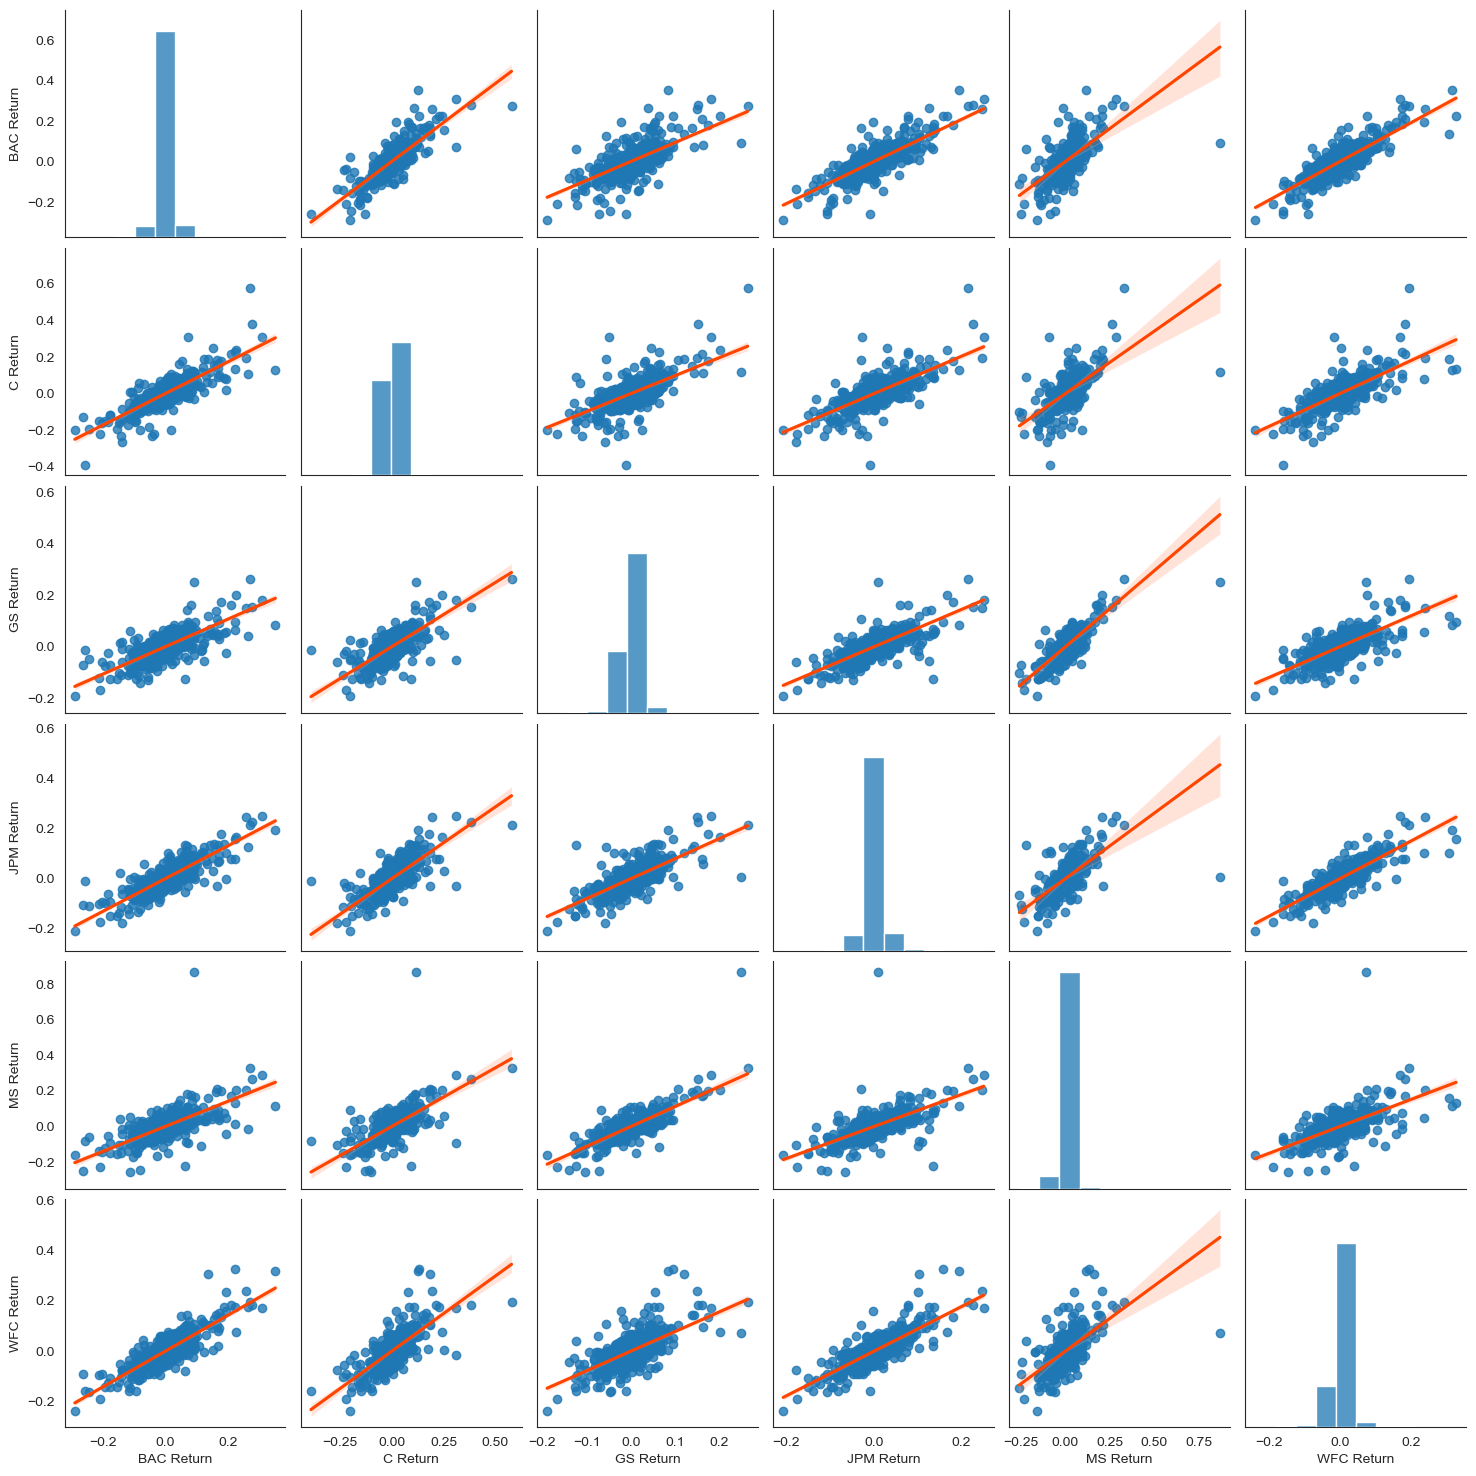

In [97]:
plt.figure('tight layout')
sns.pairplot(returns[1:], kind='reg',diag_kind = "hist", 
             diag_kws = {'bins':10},plot_kws={'line_kws':{'color':'#FF4500'}})

Best & worst single day returns:

In [98]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [99]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Volatility risk using standard deviation:

In [100]:
returns.std() # Citigroup riskiest

BAC Return    0.028989
C Return      0.030701
GS Return     0.021913
JPM Return    0.023001
MS Return     0.030165
WFC Return    0.025009
dtype: float64

In [101]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

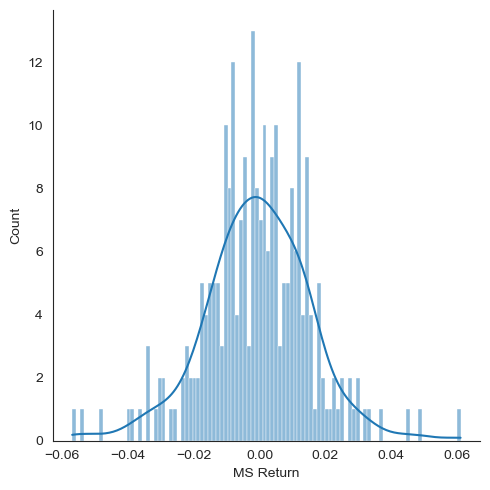

In [102]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=100, kde=True)

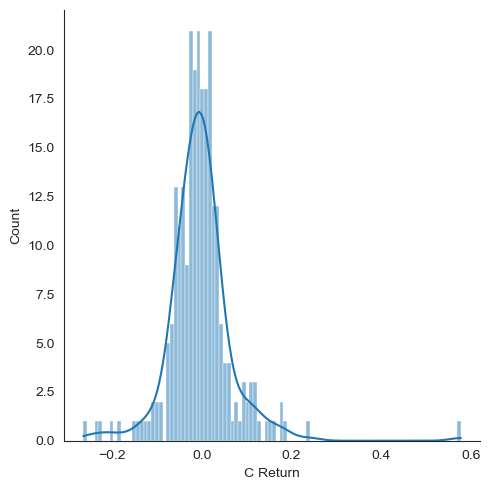

In [103]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=100, kde=True)

In [104]:
import plotly
import cufflinks as cf
cf.go_offline()

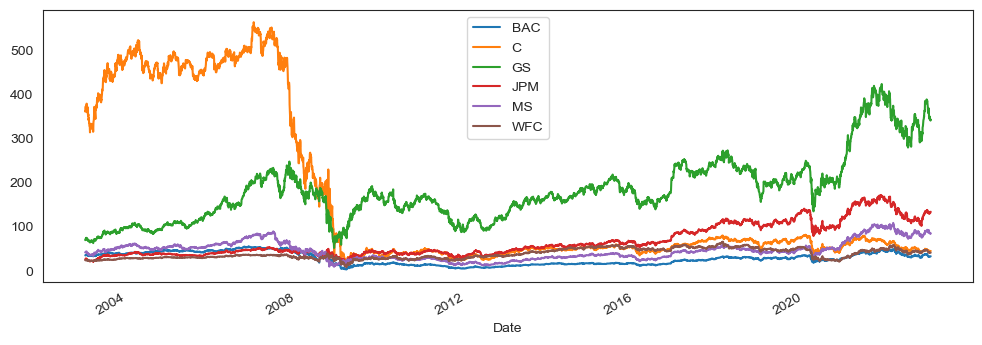

In [115]:
for each in tickers:
    bank_stocks[each]['Close'].plot(figsize=(12,4), label=each)
plt.legend(loc='best')

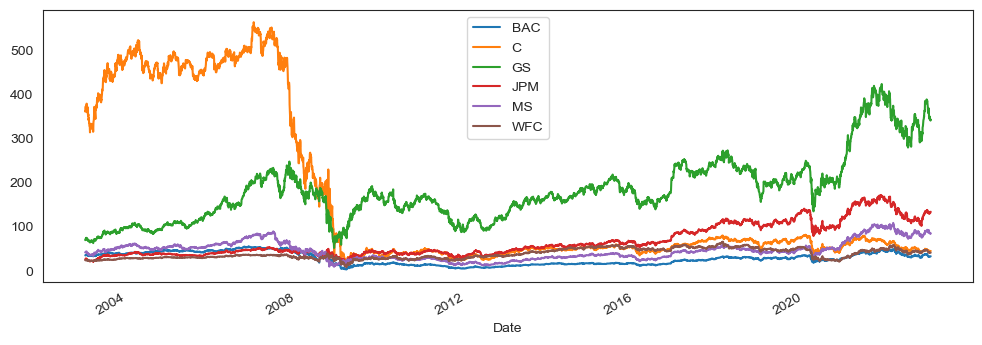

In [116]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))
plt.legend(loc='best')